<a href="https://colab.research.google.com/github/cpython-projects/da_vn/blob/main/lesson_08_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📊 ABC + XYZ Analysis in E-commerce Orders Dataset

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np


In [2]:
from google.colab import files
uploaded = files.upload()

Saving ecommerce_orders_2024.csv to ecommerce_orders_2024.csv


In [3]:
# Step 2: Load the dataset
df = pd.read_csv("ecommerce_orders_2024.csv")  # Make sure the file is in your working directory

In [4]:

# Step 3: Preview the dataset
print("\u2705 Preview of raw data:")
display(df.head())


✅ Preview of raw data:


,order_date,order_id,product,category,brand,quantity,price,discount,total,customer_id,country
0,2024-09-24,10682d3c-2370-4cb6-8671-0264e33002db,Acer Swift 5,NaN,NaN,3,1052.85,NaN,2526.84,e4c7a35c-ec48-4aeb-8952-0f2c4a7e6180,Saint Barthelemy
1,2024-11-13,cf48ccf7-d627-45c6-bda0-0a271bfe4fb3,Bose QC45,NaN,NaN,2,187.89,NaN,300.62,917e33e2-ce20-4beb-8d02-c7de45dbfd5a,Belize
2,2024-05-08,ac46015e-906e-435a-894e-b0682265785a,Sennheiser Momentum 4,NaN,NaN,3,434.37,NaN,1303.11,fc89338c-1df9-48f7-9037-3e7bec498864,Israel
3,2024-03-28,36facbfd-a75e-4506-ae15-3c5559153000,Garmin Forerunner 265,NaN,NaN,4,952.62,NaN,3429.43,ab5c9f13-e1cd-4c57-884c-bc6f4b379aac,Lithuania
4,2024-01-31,cf5b98ef-4969-4157-9214-67df55f2a360,MacBook Pro 16,NaN,NaN,4,1917.90,NaN,7288.02,05285afa-0f5e-4b90-8f7c-31e549a03788,Uzbekistan


In [5]:
# Step 4: Data Cleaning
# Convert columns to proper numeric types (handle errors gracefully)
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["discount"] = pd.to_numeric(df["discount"], errors="coerce")
df["total"] = pd.to_numeric(df["total"], errors="coerce")
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")


In [6]:
# Drop rows with missing key values
df_clean = df.dropna(subset=["product", "quantity", "price", "discount", "total", "order_date"])

In [7]:
# =============================
# ABC ANALYSIS
# =============================

# Step 5: Group sales by product
product_sales = df_clean.groupby("product")["total"].sum().reset_index()
product_sales = product_sales.sort_values(by="total", ascending=False).reset_index(drop=True)


In [8]:
# Step 6: Calculate cumulative totals and percentages
product_sales["cum_total"] = product_sales["total"].cumsum()
product_sales["cum_percent"] = product_sales["cum_total"] / product_sales["total"].sum()


In [9]:
# Step 7: Define ABC classification based on cumulative percentage
def classify_abc(p):
    if p <= 0.8:
        return "A"
    elif p <= 0.95:
        return "B"
    else:
        return "C"

product_sales["ABC_class"] = product_sales["cum_percent"].apply(classify_abc)


In [10]:
# Step 8: Show the top 10 products and their class
print("\n\U0001F4C8 Top 10 products by total sales:")
display(product_sales.head(10))



📈 Top 10 products by total sales:


,product,total,cum_total,cum_percent,ABC_class
0,Asus ROG Zephyrus,3734471.24,3734471.24,0.025801,A
1,iPhone 15 Pro,3638403.46,7372874.70,0.050939,A
2,Nintendo Switch OLED,3601261.29,10974135.99,0.075820,A
3,Steam Deck,3559929.46,14534065.45,0.100415,A
4,MacBook Air M2,3537246.62,18071312.07,0.124854,A
5,MacBook Pro 16,3517634.57,21588946.64,0.149157,A
6,KitchenAid Stand Mixer,3511806.57,25100753.21,0.173420,A
7,PlayStation 5,3493720.76,28594473.97,0.197557,A
8,Lenovo Tab P12,3489488.15,32083962.12,0.221666,A
9,Acer Swift 5,3474675.57,35558637.69,0.245672,A


In [11]:

# Step 9: Summary - count of each class
abc_counts = product_sales["ABC_class"].value_counts()
print("\n\U0001F4CA ABC Category Counts:")
print(abc_counts)


📊 ABC Category Counts:
ABC_class
A    33
B     7
C     3
Name: count, dtype: int64


In [12]:
# Optional: Save results to CSV
product_sales.to_csv("abc_classified_products.csv", index=False)
print("\n\u2705 ABC classification saved to 'abc_classified_products.csv'")
files.download("abc_classified_products.csv")


✅ ABC classification saved to 'abc_classified_products.csv'


In [13]:
# =============================
# XYZ ANALYSIS
# =============================

# Step 10: Monthly sales per product
monthly_sales = df_clean.copy()
monthly_sales["month"] = monthly_sales["order_date"].dt.to_period("M")
product_monthly = monthly_sales.groupby(["product", "month"])["total"].sum().reset_index()


In [15]:
# Step 11: Calculate coefficient of variation (CoV) for each product
xyz_stats = product_monthly.groupby("product")["total"].agg(["mean", "std"]).reset_index()
xyz_stats["cov"] = xyz_stats["std"] / xyz_stats["mean"]

# Step 12: Classify XYZ based on CoV
def classify_xyz(cov):
    if cov <= 0.5:
        return "X"
    elif cov <= 1.0:
        return "Y"
    else:
        return "Z"
xyz_stats["XYZ_class"] = xyz_stats["cov"].apply(classify_xyz)


In [16]:
# Step 13: Merge ABC and XYZ classifications
abc_xyz = pd.merge(product_sales[["product", "ABC_class"]], xyz_stats[["product", "XYZ_class"]], on="product", how="inner")


In [17]:
# Step 14: Output combined ABC-XYZ classification
print("\n\U0001F4CA Combined ABC-XYZ Classification (sample):")
display(abc_xyz.sample(10))



📊 Combined ABC-XYZ Classification (sample):


,product,ABC_class,XYZ_class
7,PlayStation 5,A,X
21,Nikon Z50,A,X
4,MacBook Air M2,A,X
42,Instant Pot Duo Evo,C,X
5,MacBook Pro 16,A,X
0,Asus ROG Zephyrus,A,X
2,Nintendo Switch OLED,A,X
15,OnePlus 11,A,X
27,Pixel 8,A,X
9,Acer Swift 5,A,X


In [18]:

# Step 15: Count of each ABC-XYZ segment
abc_xyz['Segment'] = abc_xyz['ABC_class'] + abc_xyz['XYZ_class']
segment_counts = abc_xyz['Segment'].value_counts().sort_index()

print("\n\U0001F4C9 Product count per ABC-XYZ segment:")
display(segment_counts)



📉 Product count per ABC-XYZ segment:


,count
Segment,
AX,33
BX,7
CX,3


In [19]:
# Step 16: Matrix view (pivot table)
segment_matrix = abc_xyz.pivot_table(index='ABC_class', columns='XYZ_class', aggfunc='size', fill_value=0)
print("\U0001F4CA ABC-XYZ Segment Matrix:")
display(segment_matrix)


📊 ABC-XYZ Segment Matrix:


XYZ_class,X
ABC_class,
A,33
B,7
C,3


In [ ]:
# Optional: Save to CSV
abc_xyz.to_csv("abc_xyz_classification.csv", index=False)
print("\u2705 Saved ABC-XYZ classification to 'abc_xyz_classification.csv'")
files.download()

In [20]:
# =============================
# SALES DYNAMICS ANALYSIS
# =============================

# Step 17: Aggregate monthly total sales
monthly_dynamics = df_clean.copy()
monthly_dynamics["month"] = monthly_dynamics["order_date"].dt.to_period("M")
sales_by_month = monthly_dynamics.groupby("month")["total"].sum().reset_index()
sales_by_month["month"] = sales_by_month["month"].astype(str)

In [21]:
# Step 18: Display monthly sales dynamics
print("\n\U0001F4C5 Monthly Sales Dynamics:")
display(sales_by_month)



📅 Monthly Sales Dynamics:


,month,total
0,2024-01,12522301.27
1,2024-02,11556846.55
2,2024-03,11975867.00
3,2024-04,12300847.84
4,2024-05,12222858.84
5,2024-06,11599428.65
6,2024-07,12542102.85
7,2024-08,11841024.13
8,2024-09,11920618.71
9,2024-10,12176330.57


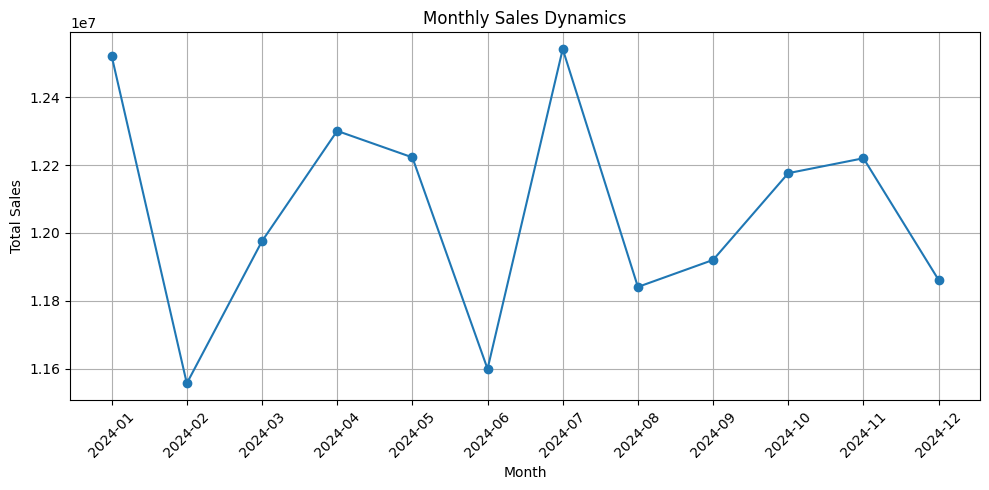

In [22]:
# Optional: Plot the dynamics (uncomment below if using Jupyter Notebook with matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(sales_by_month["month"], sales_by_month["total"], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Dynamics")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


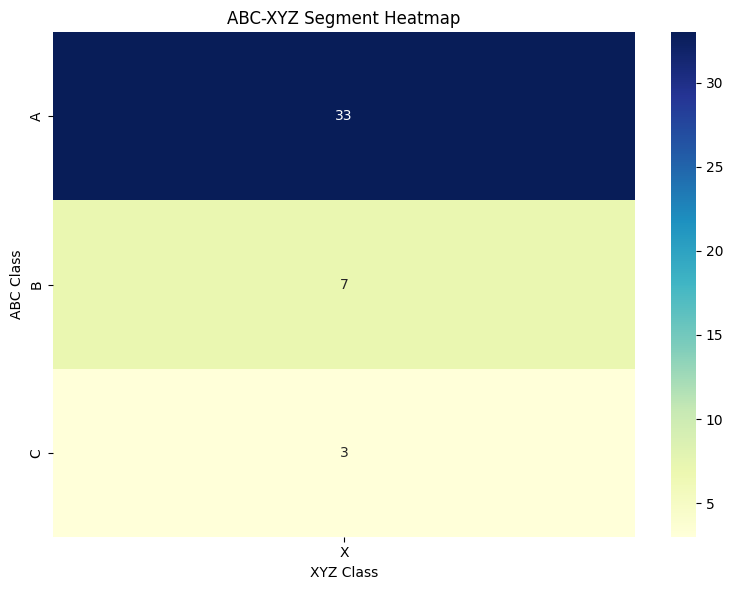

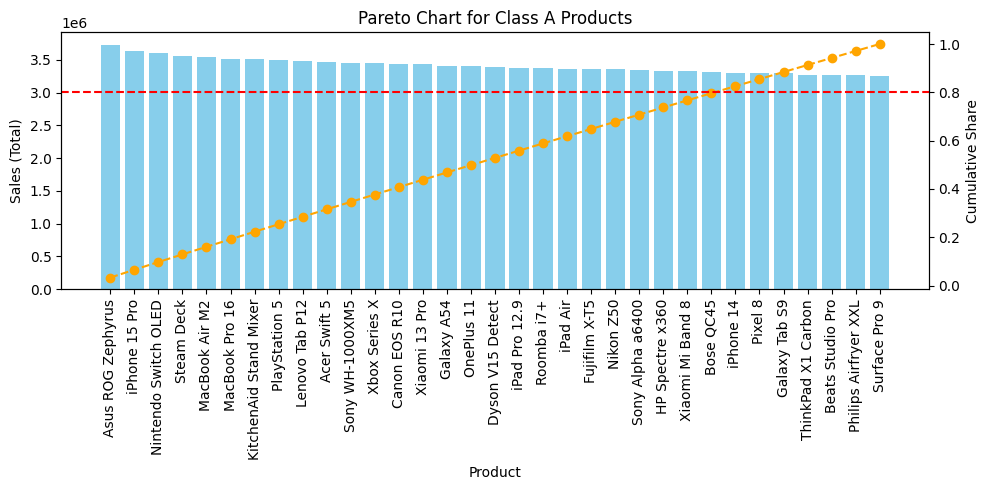

In [23]:
# =============================
# 📍 VISUALIZATION: ABC-XYZ Heatmap
# =============================
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(segment_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("ABC-XYZ Segment Heatmap")
plt.xlabel("XYZ Class")
plt.ylabel("ABC Class")
plt.tight_layout()
plt.show()

# =============================
# 📍 VISUALIZATION: Pareto Chart for Class A Products
# =============================

# Filter only A-class products
a_products = product_sales[product_sales['ABC_class'] == 'A'].copy()
a_products = a_products.sort_values(by='total', ascending=False).reset_index(drop=True)
a_products['cum_percent'] = a_products['total'].cumsum() / a_products['total'].sum()

# Pareto plot
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.bar(a_products['product'], a_products['total'], color='skyblue')
ax2 = ax.twinx()
ax2.plot(a_products['product'], a_products['cum_percent'], color='orange', marker='o', linestyle='--')
ax2.axhline(0.8, color='red', linestyle='dashed')

ax.set_title("Pareto Chart for Class A Products")
ax.set_ylabel("Sales (Total)")
ax.set_xlabel("Product")
ax.tick_params(axis='x', rotation=90)
ax2.set_ylabel("Cumulative Share")
plt.tight_layout()
plt.show()


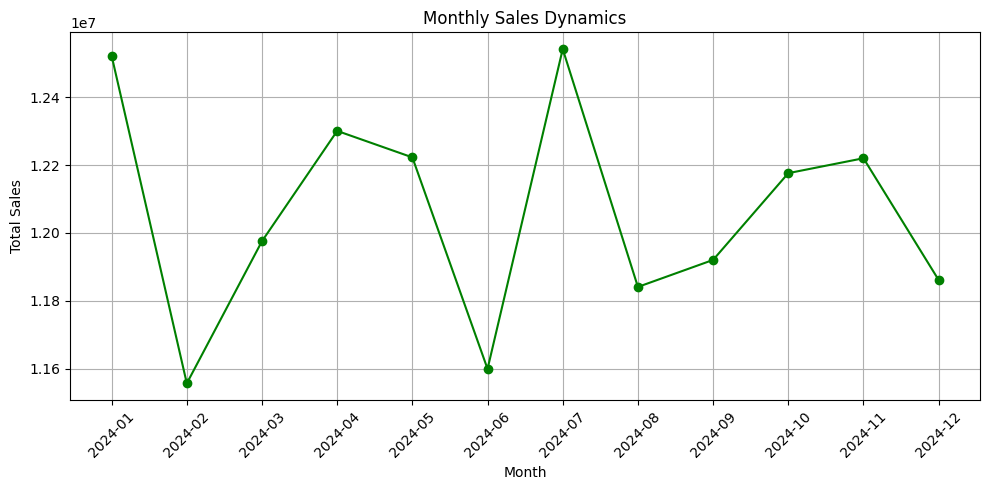

In [24]:
# =============================
# 📈 VISUALIZATION: Sales Dynamics by Month
# =============================
plt.figure(figsize=(10, 5))
plt.plot(sales_by_month["month"], sales_by_month["total"], marker='o', color='green')
plt.title("Monthly Sales Dynamics")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
# =============================
# 💡 Recommendations by ABC-XYZ Segment
# =============================

recommendations = {
    "AX": "✅ Maintain high stock, automate replenishment. Core product line.",
    "AY": "📊 Monitor seasonal trends, adjust stock dynamically.",
    "AZ": "⚠️ High value but unstable – keep low stock, analyze instability causes.",
    "BX": "✅ Stable and mid-value – maintain availability, support with marketing.",
    "BY": "🌀 Moderate risk – watch trends, avoid overstocking.",
    "BZ": "❗ Volatile and mid-value – consider reducing SKUs or targeting promos.",
    "CX": "✅ Reliable fillers – keep small stock, ensure availability.",
    "CY": "🧊 Irregular demand, low value – stock very limited.",
    "CZ": "🚫 Consider delisting or heavy discounting – low value & unstable.",
}

# Display recommendations
print("💡 Recommendations for ABC-XYZ Segments:")
for segment, advice in recommendations.items():
    print(f"{segment}: {advice}")


💡 Recommendations for ABC-XYZ Segments:
AX: ✅ Maintain high stock, automate replenishment. Core product line.
AY: 📊 Monitor seasonal trends, adjust stock dynamically.
AZ: ⚠️ High value but unstable – keep low stock, analyze instability causes.
BX: ✅ Stable and mid-value – maintain availability, support with marketing.
BY: 🌀 Moderate risk – watch trends, avoid overstocking.
BZ: ❗ Volatile and mid-value – consider reducing SKUs or targeting promos.
CX: ✅ Reliable fillers – keep small stock, ensure availability.
CY: 🧊 Irregular demand, low value – stock very limited.
CZ: 🚫 Consider delisting or heavy discounting – low value & unstable.


In [26]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.3 MB/s eta 0:00:00


In [27]:
# =============================
# 🎛️ Interactive Segment Explorer (ABC-XYZ)
# =============================
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdown for segment selection
segment_dropdown = widgets.Dropdown(
    options=sorted(abc_xyz['Segment'].unique()),
    description='Segment:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='300px')
)

output = widgets.Output()

def show_segment_data(selected_segment):
    with output:
        clear_output()
        print(f"🔍 Products in Segment {selected_segment}:")
        segment_products = abc_xyz[abc_xyz['Segment'] == selected_segment].merge(
            product_sales[['product', 'total']], on='product')
        display(segment_products.sort_values(by='total', ascending=False).head(10))

        # Optional: Monthly sales plot for top 1 product
        top_product = segment_products.sort_values(by='total', ascending=False).iloc[0]['product']
        monthly_top = product_monthly[product_monthly['product'] == top_product]
        monthly_top_sorted = monthly_top.sort_values('month')

        plt.figure(figsize=(8, 4))
        plt.plot(monthly_top_sorted['month'].astype(str), monthly_top_sorted['total'], marker='o')
        plt.title(f"📈 Monthly Sales: {top_product}")
        plt.xlabel("Month")
        plt.ylabel("Sales")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

widgets.interact(show_segment_data, selected_segment=segment_dropdown)
display(output)


interactive(children=(Dropdown(description='Segment:', layout=Layout(width='300px'), options=('AX', 'BX', 'CX'…

Output()